In [18]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

train = pd.read_table('../data/train/train_C.tsv')

user_ids = train['user_id'].unique()
user_ids.sort()
user_ids_index = pd.Index(user_ids)
train['user_id_int'] = train['user_id'].map(lambda x : user_ids_index.get_loc(x))

product_ids = train['product_id'].unique()
product_ids.sort()
product_ids_index = pd.Index(product_ids)
train['product_id_int'] = train['product_id'].map(lambda x : product_ids_index.get_loc(x))

train['event_type_1'] = train['event_type'] == 1
train['event_type_2'] = train['event_type'] == 2
train['event_type_3'] = train['event_type'] == 3

user_e2 = train.groupby('user_id_int')['event_type_2'].sum().sort_index()
user_e3 = train.groupby('user_id_int')['event_type_3'].sum().sort_index()
user_merged_count_df = pd.concat([user_e2, user_e3], axis=1)
user_e1 = train.groupby('user_id_int')['event_type_1'].sum().sort_index()
user_merged3_count_df = pd.concat([user_merged_count_df, user_e1], axis=1)

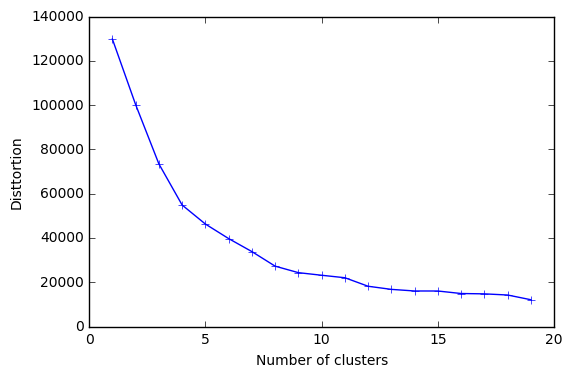

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(user_merged3_count_df)
user_merged3_count_df_std = sc.transform(user_merged3_count_df)
from sklearn.cluster import KMeans
X = user_merged3_count_df_std
dist_list =[]
for i in range(1,20):
    kmpp = KMeans(n_clusters=i,init="random",n_init=5,max_iter=100,random_state=0) 
    kmpp.fit(X)
    dist_list.append(kmpp.inertia_)
plt.plot(range(1,20),dist_list,marker='+');
plt.xlabel("Number of clusters");
plt.ylabel("Disttortion");

In [6]:
X = user_merged3_count_df_std
kmpp = KMeans(n_clusters=4,init="random",random_state=0)#n_clustersを適切にえらぶ
kmpp.fit(X)
user_label_df = pd.DataFrame(kmpp.labels_, columns=["user_cluster"])

In [9]:
user_label_df.to_csv('user_cluster.csv')

In [13]:
product_e2 = train.groupby('product_id_int')['event_type_2'].sum().sort_index()
product_e3 = train.groupby('product_id_int')['event_type_3'].sum().sort_index()
product_merged_count_df = pd.concat([product_e2, product_e3], axis=1)
product_e1 = train.groupby('product_id_int')['event_type_1'].sum().sort_index()
product_merged3_count_df = pd.concat([product_merged_count_df, product_e1], axis=1)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(product_merged3_count_df)
product_merged3_count_df_std = sc.transform(product_merged3_count_df)

In [16]:
X = product_merged3_count_df_std
kmpp = KMeans(n_clusters=4,init="random",random_state=0)#n_clustersを適切にえらぶ
kmpp.fit(X)
product_label_df = pd.DataFrame(kmpp.labels_, columns=["product_cluster"])
product_label_df.to_csv('product_cluster.csv')

In [19]:
user_merged3_count_df.columns = ['クリック', '購入', '閲覧']
user_merged3_count_df.corr()

,クリック,購入,閲覧
クリック,1.000000,0.014201,0.126796
購入,0.014201,1.000000,0.053949
閲覧,0.126796,0.053949,1.000000
